Q1. What is the mathematical formula for a linear SVM?

Q2. What is the objective function of a linear SVM?

Q3. What is the kernel trick in SVM?

Q4. What is the role of support vectors in SVM Explain with example

Q5. Illustrate with examples and graphs of Hyperplane, Marginal plane, Soft margin and Hard margin in SVM?

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

def Support(clf, X, y, title):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)
    plt.title(title)

    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = clf.decision_function(xy).reshape(XX.shape)
    
    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
               linewidth=1, facecolors='none', edgecolors='k')
    
    plt.show()

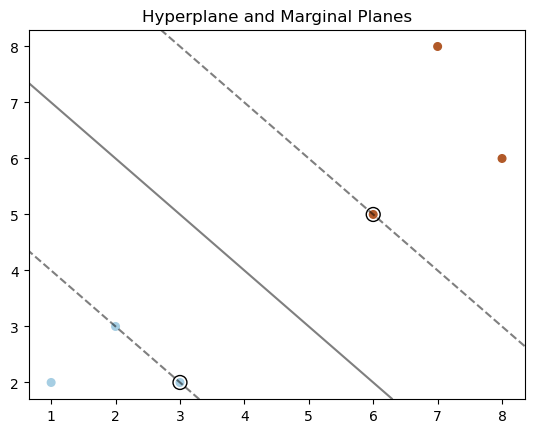

In [11]:
X1 = np.array([[1, 2], [2, 3], [3, 2]])
y1 = np.array([0, 0, 0])
X2 = np.array([[6, 5], [7, 8], [8, 6]])
y2 = np.array([1, 1, 1])

X = np.vstack((X1, X2))
y = np.hstack((y1, y2))

clf = svm.SVC(kernel='linear', C=1)
clf.fit(X, y)

Support(clf, X, y, "Hyperplane and Marginal Planes")

Q6. SVM Implementation through Iris dataset.

In [41]:
# Loading of Iris dataset

In [12]:
import seaborn as sb

In [14]:
flower = sb.load_dataset('iris')

In [15]:
flower.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [17]:
# split dataset into training set and testing set

In [18]:
X = flower.iloc[:,:-1]
Y = flower['species']

In [21]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.30,random_state=42)

In [22]:
# Train a linear SVM classifier on the training set and predict the labels for the testing set

In [23]:
from sklearn.svm import SVC

In [24]:
SV_classifier  = SVC()

In [25]:
SV_classifier.fit(X_train,Y_train)

SVC()

In [26]:
Y_pred = SV_classifier.predict(X_test)

In [28]:
# Compute the accuracy of the model on the testing set

In [29]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [30]:
classification_report(Y_test,Y_pred)

'              precision    recall  f1-score   support\n\n      setosa       1.00      1.00      1.00        19\n  versicolor       1.00      1.00      1.00        13\n   virginica       1.00      1.00      1.00        13\n\n    accuracy                           1.00        45\n   macro avg       1.00      1.00      1.00        45\nweighted avg       1.00      1.00      1.00        45\n'

In [31]:
confusion_matrix(Y_test,Y_pred)

array([[19,  0,  0],
       [ 0, 13,  0],
       [ 0,  0, 13]])

In [39]:
accuracy_score(Y_test,Y_pred)

1.0

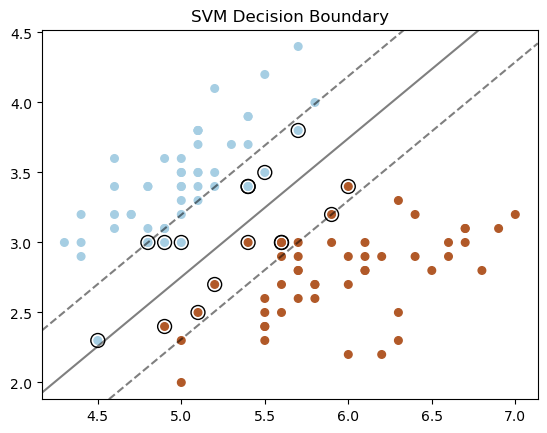

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets

iris = datasets.load_iris()
X = iris.data[:, :2]
y = iris.target

X = X[y != 2]
y = y[y != 2]

clf = svm.SVC(kernel='linear', C=1)
clf.fit(X, y)

def plot_decision_boundaries(clf, X, y):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)
    plt.title("SVM Decision Boundary")

    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = clf.decision_function(xy).reshape(XX.shape)
    
    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

    ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
               linewidth=1, facecolors='none', edgecolors='k')
    
    plt.show()

plot_decision_boundaries(clf, X, y)

Try different values of the regularisation parameter C and see how it affects the performance of the model.

In [42]:
SVC_1 = SVC(kernel='rbf',gamma=0.5,C=2.0)

In [43]:
SVC_1.fit(X_train,Y_train)

SVC(C=2.0, gamma=0.5)

In [46]:
y_new = SVC_1.predict(X_test)

In [47]:
accuracy_score(Y_test,y_new)

1.0

In [48]:
SVC_2 = SVC(kernel='rbf',gamma=0.5,C=0.5)

In [49]:
SVC_2.fit(X_train,Y_train)

SVC(C=0.5, gamma=0.5)

In [50]:
Y_find = SVC_2.predict(X_test)

In [51]:
accuracy_score(Y_test,Y_find)

1.0

In [52]:
SVC_3 = SVC(kernel='rbf',gamma=0.5,C=6.0)

In [53]:
SVC_3.fit(X_train,Y_train)

SVC(C=6.0, gamma=0.5)

In [54]:
y_final =  SVC_3.predict(X_test)

In [55]:
accuracy_score(Y_test,y_final)

1.0